In [53]:
import numpy as np
import pandas as pd
import gudhi as gd  
from sklearn import manifold
from pylab import *
import sklearn_tda
import matplotlib.pyplot as plot
%matplotlib inline

In [61]:
my_data = np.recfromcsv('./InteractiveJPDwB/data/seed1_data.csv', delimiter=',')
my_data = [[i[1],i[2]] for i in my_data]

In [62]:
import gudhi
rips_complex = gudhi.RipsComplex(points=my_data)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)

Rips complex is of dimension 2 - 166750 simplices - 100 vertices


In [63]:
BarCodes_RipsAll = simplex_tree.persistence()
BarCodes_Rips1 = list(filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))

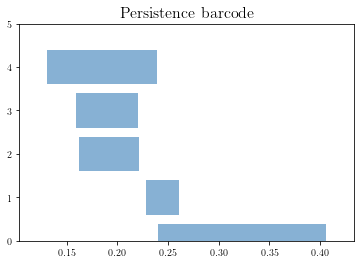

In [64]:
gudhi.plot_persistence_barcode(BarCodes_Rips1)

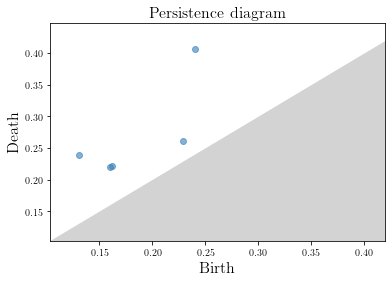

In [65]:
gudhi.plot_persistence_diagram(BarCodes_Rips1)

In [66]:
from gudhi import *
entropy = representations.Entropy(normalized=False)
entropy(np.array([j for i,j in BarCodes_RipsAll if i == 1]))

array([1.3318803])

100

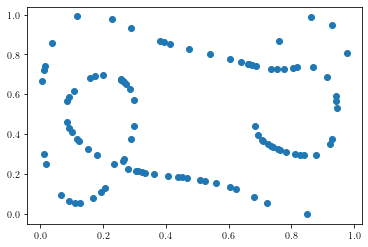

In [67]:
xd, yd = [i[0] for i in my_data], [i[1] for i in my_data]
plt.plot(xd, yd, 'o')
len(xd)

In [36]:
from persim.persistent_entropy import *
from ripser import ripser
#from persim import plot_diagrams

#data = np.loadtxt('RAW_t=100_data(0.35).dat')
#fig = plt.figure()
#data1=data.transpose()

#plt.title("PERSISTENCE DIAGRAM")
data1 = np.array([xd, yd]).transpose()
diagrams = ripser(data1, maxdim=2)['dgms']

#plot_diagrams(diagrams, show=True)
#plot_diagrams(diagrams, lifetime=True)

#bloo = np.sort(np.array([[j[1]-j[0], j] for i, j in BarCodes_Rips1]), axis = 0)[::-1]
#bloo = np.array([j for i,j in bloo])
#diagrams = bloo
#print(diagrams)
blah = persistent_entropy(diagrams)
for i in range(len(blah)):
    print("Persistant Entropy for Dim {} is {}".format(i, blah[i]))
new_arr = []
for i in diagrams[1]:
        print("Lifetime:",i[1]-i[0], i)

Persistant Entropy for Dim 0 is 4.468885385312567
Persistant Entropy for Dim 1 is 2.087251216875273
Persistant Entropy for Dim 2 is -0.0
Lifetime: 0.0003584623336791992 [0.30060717 0.30096564]
Lifetime: 0.004442960023880005 [0.28945822 0.29390118]
Lifetime: 0.02568766474723816 [0.28831896 0.31400663]
Lifetime: 0.007300511002540588 [0.21878037 0.22608088]
Lifetime: 0.004560679197311401 [0.2176282  0.22218888]
Lifetime: 0.0017697960138320923 [0.21721701 0.21898681]
Lifetime: 0.001050800085067749 [0.21684644 0.21789724]
Lifetime: 0.0034087002277374268 [0.21465334 0.21806204]
Lifetime: 0.0005093365907669067 [0.21228957 0.21279891]
Lifetime: 0.02968233823776245 [0.210025   0.23970734]
Lifetime: 0.020609140396118164 [0.20948021 0.23008935]
Lifetime: 0.1338634490966797 [0.18440238 0.31826583]
Lifetime: 0.02458101511001587 [0.17348489 0.19806591]
Lifetime: 0.041013672947883606 [0.14804222 0.18905589]
Lifetime: 0.08687737584114075 [0.1414703  0.22834767]
Lifetime: 0.11565397679805756 [0.1087299

In [123]:
dgm = np.array([[1, 2],[3, 4], [5, 6]])
dgm[:, 1]

array([2, 4, 6])

In [26]:
from persim import persistent_entropy as pe 
peData = np.array([j for i,j in BarCodes_Rips0])
pe.persistent_entropy(peData)

array([2.08725139])

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from gudhi.point_cloud.dtm import DistanceToMeasure
from gudhi.weighted_rips_complex import WeightedRipsComplex
from gudhi import plot_persistence_barcode
pts = my_data
dist = cdist(pts,pts)
dtm = DistanceToMeasure(2, q=2, metric="precomputed")
r = dtm.fit_transform(dist)
w_rips = WeightedRipsComplex(distance_matrix=dist, weights=r)
st = w_rips.create_simplex_tree(max_dimension=2)
plot_persistence_barcode(st.persistence())

In [ ]:

# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
#mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
#                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

In [ ]:
from simplicial import *

c = SimplicialComplex()
# add a simplex with a generated name
s1 = c.addSimplex()

# add simplices whose names we want to specify
s2 = c.addSimplex(id = 2)
s3 = c.addSimplex(id = 3)

l23 = c.addSimplex(fs = [ 2, 3 ])

l12 = c.addSimplex(fs = [ s1, 2 ])
l31 = c.addSimplex(fs = [ s1, 3 ])

# create the triangle
t123 = c.addSimplex(fs = [l12, l23, l31])

txyz = c.addSimplexOfOrder(2, id = 'xyz')

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 21 06:03:32 2018
@author: nolte
D. D. Nolte, Introduction to Modern Dynamics: Chaos, Networks, Space and Time, 2nd ed. (Oxford,2019)
"""
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
# model_case 1 = Pendulum
# model_case 2 = Double Well
print(' ')
print('Duffing.py')
 
alpha = 1
beta = 1
delta = 0.3
gam = 0.35
w = 1.2


def flow_deriv(x_y_z,tspan):
    x, y, z = x_y_z
    a = y
    b = delta*np.cos(w*tspan) - alpha*x - beta*x**3 - gam*y
    c = w
    return[a,b,c]
                 
T = 2*np.pi/w
 
px1 = 0 # np.random.rand(1)
xp1 = 0 # np.random.rand(1)
w1 = 0
 
x_y_z = [xp1, px1, w1]
 
# Settle-down Solve for the trajectories
t = np.linspace(0, 2000, 40000)
x_t = integrate.odeint(flow_deriv, x_y_z, t)
x0 = x_t[39999,0:3]
 
tspan = np.linspace(1,2000,40000)
x_t = integrate.odeint(flow_deriv, x0, tspan)
siztmp = np.shape(x_t)
siz = siztmp[0]
 
y1 = x_t[:,0]
y2 = x_t[:,1]
y3 = x_t[:,2]
     
plt.figure(2)
lines = plt.plot(y1[1:2000],y2[1:2000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
plt.savefig('Duffing')

In [ ]:
import pandas as pd 
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
ll = xx(y1[1:150])
la = xx(y2[1:150])
pd.DataFrame(np.array(list(zip(ll,la)))).to_csv("./InteractiveJPDwB/data/seed1_data.csv", header=['X_value','Y_value'], index=True, index_label='point_id')

In [ ]:
plt.figure(2)
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
ll = xx(y1[1:500])
la = xx(y2[1:500])
lines = plt.plot(ll,la,'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
plt.savefig('Duffing')

In [ ]:
a = np.array([2*i for i in [-1,-2,-3, -4,1,2,3,4]])
np.interp(a, (a.min(), a.max()), (0, +1))